### This pyhton script was developed to inteprate the outputs of cordex experiments and specify the model combinations most suitable to run Vectri.

#### The conditions taken into account were
- The models perfomance in the various climatic zones in Ghana
- The prescence of leap years in models outputs


In [1]:
import xarray as xr
import glob
import matplotlib.pyplot as plt

In [2]:
def pro_data(da):
    dat = da.drop_vars('lon').drop_vars('lat')
    dat = dat.rename({'rlon':'lon'}).rename({'rlat':'lat'})
    return(dat)

def check_leap(data):
    return(data.time.dt.calendar)

In [3]:
files = glob.glob('../../stevecordex/*.nc')
files_obs = glob.glob('Ghana_*.nc')

In [23]:
pr_data = []
tn_data = []
tx_data = []
for i, data in enumerate(files):
    if data[18]=='p':
        var = 'pr'
        print('working on '+ data[18:-3])
        ds = xr.open_dataset(data)[var]*86400
        # print('check whether ' + data[32:38] + ' combined with ' + data[-36:-32] + ' has leap years')
        print('checking for leap years')
        c = check_leap(ds)
        if c == 'proleptic_gregorian':
            print('has leap years')
            p_data = pro_data(ds)
            p_data = p_data.assign_attrs({'Model': data[18:-3]})
            print('processed \n')
            pr_data.append(p_data)
        else:
            print('Has no leap years hence ignored \n')
    
    if data[18:24]=='tasmin':
        print('working on '+ data[18:-3])
        ds = xr.open_dataset(data)[data[18:24]]
        print('checking for leap years')
        c = check_leap(ds)
        if c == 'proleptic_gregorian':
            print('has leap years')
            p_data = pro_data(ds)
            p_data = p_data.assign_attrs({'Model': data[18:-3]})
            print('processed \n')
            tn_data.append(p_data)
        else:
            print('Has no leap years hence ignored \n')

    if data[18:24]=='tasmax':
        var = data[18:24]
        print('working on '+ data[18:-3])
        ds = xr.open_dataset(data)[data[18:24]]
        print('checking for leap years')
        c = check_leap(ds)
        if c == 'proleptic_gregorian':
            print('has leap years')
            p_data = pro_data(ds)
            p_data = p_data.assign_attrs({'Model': data[18:-3]})
            print('processed \n')
            tx_data.append(p_data)
        else:
            print('Has no leap years hence ignored \n')

for i, data in enumerate(files_obs):
    if data[6] == 'c':
        ds = xr.open_dataset(data)
        ds = ds.rename({'longitude':'lon'}).rename({'latitude':'lat'}).rename({'precip':'pr'})
        ds = ds.assign_attrs({'Chirps': data[6:11]})['pr']
        pr_data.append(ds)
        print(data[:-3]+ ' processed \n')
    else:    
        ds = xr.open_dataset(data)
        ds = ds.rename({'longitude':'lon'}).rename({'latitude':'lat'}).rename(
            {'m'+files_obs[i][13] +'2'+'t':'tasma'+files_obs[i][13]})+273.15
        # ds = ds['tasma'+files_obs[i][13]]
        # ds = ds.assign_attrs({'ERA_5': 'm'+files_obs[i][13] +'2'+'t'})
        
        # if ds['tasma'+files_obs[i][13]] == 'tasmax':
        if data[11:14] == 'dTx':
            
            tx_data.append(ds['tasma'+files_obs[i][13]].assign_attrs(
                {'ERA_5': 'm'+files_obs[i][13] +'2'+'t'}))
        else:
            tn_data.append(ds['tasma'+files_obs[i][13]].assign_attrs(
                {'ERA_5': 'm'+files_obs[i][13] +'2'+'t'}))
        print(data[:-3]+ ' processed \n')

working on pr_GHA-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051230
checking for leap years
Has no leap years hence ignored 

working on pr_GHA-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051231
checking for leap years
has leap years
processed 

working on pr_GHA-22_NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051231
checking for leap years
has leap years
processed 

working on tasmax_GHA-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051230
checking for leap years
Has no leap years hence ignored 

working on tasmax_GHA-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051231
checking for leap years
has leap years
processed 

working on tasmax_GHA-22_NCC-NorESM1-M_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-20051231
checking for leap years
has leap years
processed 

working on tasmin_GHA-22_MOHC-HadGEM2-ES_historical_r1i1p1_GERICS-REMO2015_v1_day_19710101-200

In [37]:
def Plots(data):
    period = ['2001', '2005']
    fig, ax = plt.subplots(3,2, figsize=(15,8), squeeze = False)
    ax = ax.flatten()

    titles = ['Sudan','Guinea','Transition','Forest','Coast','q']

    for i in data:
        i.sel(lon ='-1', lat='11',method='nearest').sel(time=slice(period[0],period[1])).plot(ax=ax[0])
        i.sel(lon ='-1', lat='8',method='nearest').sel(time=slice(period[0],period[1])).plot(ax=ax[1])
        i.sel(lon ='1', lat='8.5',method='nearest').sel(time=slice(period[0],period[1])).plot(ax=ax[2])
        i.sel(lon ='-2', lat='7',method='nearest').sel(time=slice(period[0],period[1])).plot(ax=ax[3])
        i.sel(lon ='0', lat='5.5',method='nearest').sel(time=slice(period[0],period[1])).plot(ax=ax[4])

    for i,j in enumerate(ax):
        # ax[i].title.set_text(titles[i])
        ax[i].set_title(titles[i])
        # ax[i].legend()  
    ax[-1].remove()

    plt.suptitle('A plot of observed against MPI-M-MPI-ESM with GERICS-REMO2015 and NCC-NorESM1-M with GERICS-REMO2015')
    plt.tight_layout()


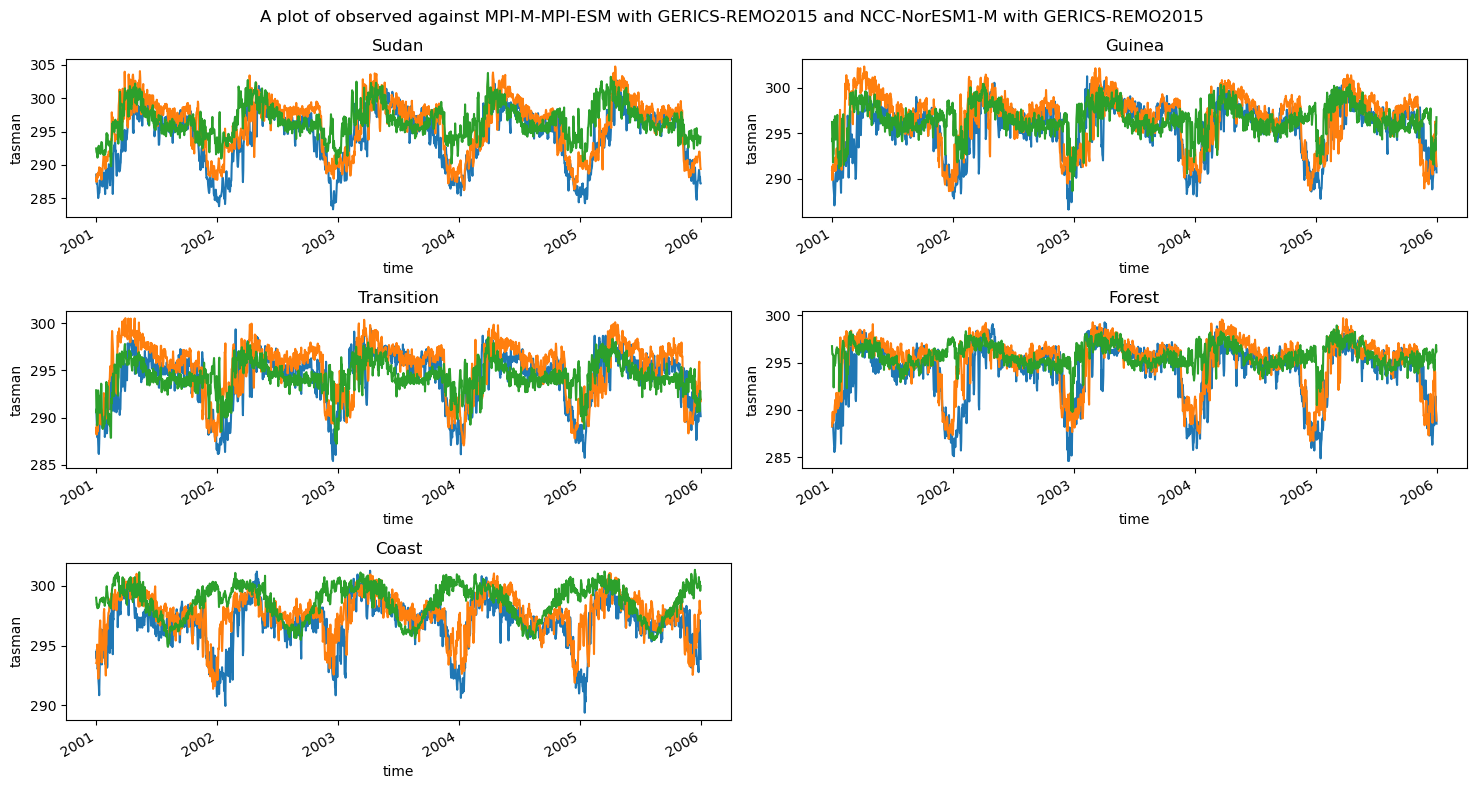

In [38]:
Plots(tn_data)

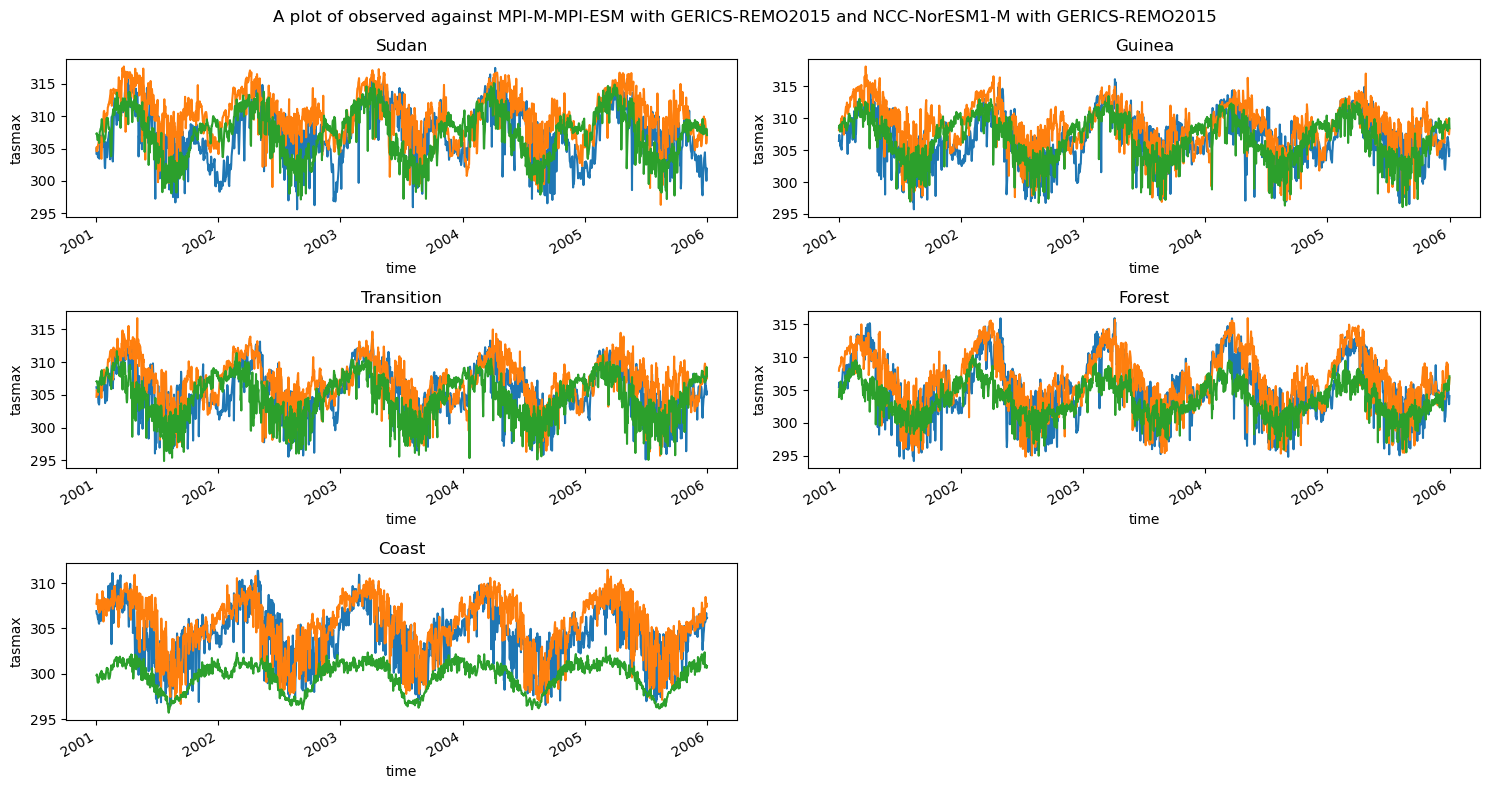

In [39]:
Plots(tx_data)

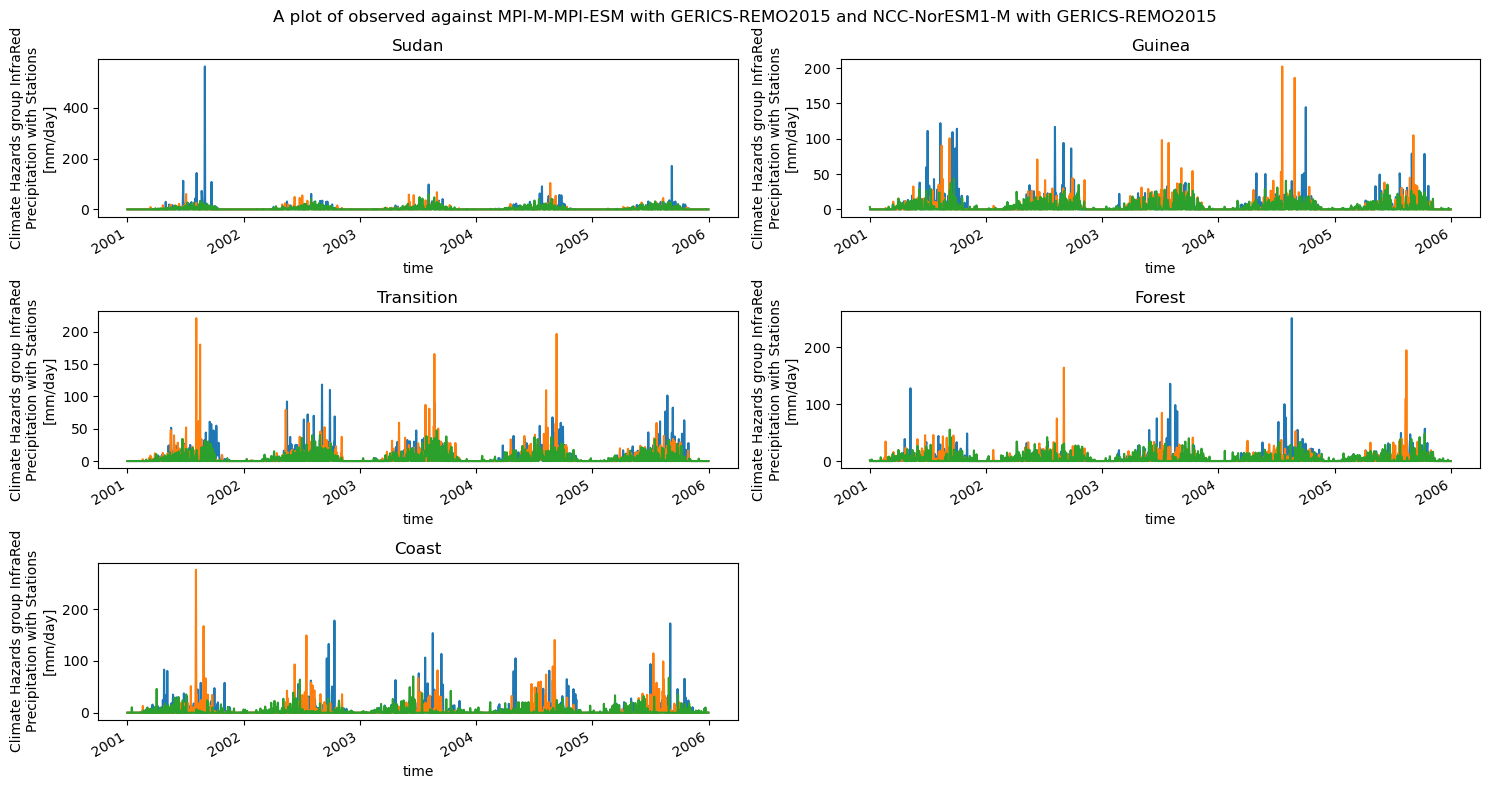

In [40]:
Plots(pr_data)